In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

from sklearn.metrics import r2_score


#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from IPython.display import Image
import glob
import cv2
import random


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
import tensorflow

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (128, 128, 3)  # Example input shape for an RGB image
inputs = Input(shape=input_shape)


df = pd.read_csv('df.csv', index_col= 0)

In [6]:
image_rows = 128
image_cols = 128
batch_size = 4096

X   = df.drop(['Age', 'Gender'], axis = 1)
y = df['Gender']
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

y = df['Age']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y, test_size=0.25, random_state=42)



image_shape = (image_rows,image_cols,3)
train_data = np.array(X_train, dtype = 'float32')
test_data = np.array(X_test, dtype='float32')

train_data = train_data.reshape(train_data.shape[0],*image_shape)
test_data = test_data.reshape(test_data.shape[0],*image_shape)

x_train = train_data/255
x_test= test_data/255

In [7]:
# Shared convolutional base
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

In [8]:
# Classification & regression output
classification_output = Dense(1, activation='sigmoid', name='classification_output')(x)
regression_output = Dense(1, name='regression_output')(x)

model = Model(inputs=inputs, outputs=[classification_output, regression_output])

In [9]:
model.compile(optimizer='adam', 
              loss={'classification_output': 'binary_crossentropy', 'regression_output': 'mae'},
              metrics={'classification_output': 'accuracy', 'regression_output': 'mae'})

In [10]:
# Train the model
history = model.fit(x_train, {'classification_output': y_class_train, 'regression_output': y_reg_train}, 
                    epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - classification_output_accuracy: 0.5271 - loss: 42.8289 - regression_output_mae: 41.9847 - val_classification_output_accuracy: 0.4286 - val_loss: 25.9376 - val_regression_output_mae: 25.1995
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - classification_output_accuracy: 0.5097 - loss: 27.5689 - regression_output_mae: 24.8967 - val_classification_output_accuracy: 0.4286 - val_loss: 26.5098 - val_regression_output_mae: 25.1470
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - classification_output_accuracy: 0.4992 - loss: 27.7356 - regression_output_mae: 24.8664 - val_classification_output_accuracy: 0.4286 - val_loss: 26.1940 - val_regression_output_mae: 25.1765
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - classification_output_accuracy: 0.6526 - loss: 26.2228 - regression_output_mae: 24.4991 - val_classification_output_accuracy: 0.5714 - val_loss: 26.3914 - val_regression_output_mae: 25.1594
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━

Classification Loss: Both the training and validation losses are plotted using loss and val_loss respectively. These keys include both classification and regression losses combined. Typically, you would want to separate them, but since the keys do not distinguish between the losses of different outputs, they are plotted together.


Classification Accuracy: The training and validation accuracies are plotted using classification_output_accuracy and val_classification_output_accuracy.


Regression Loss: This is represented by the same keys as the classification loss since they are combined.

Regression MAE: The training and validation MAE values are plotted using regression_output_mae and val_regression_output_mae.


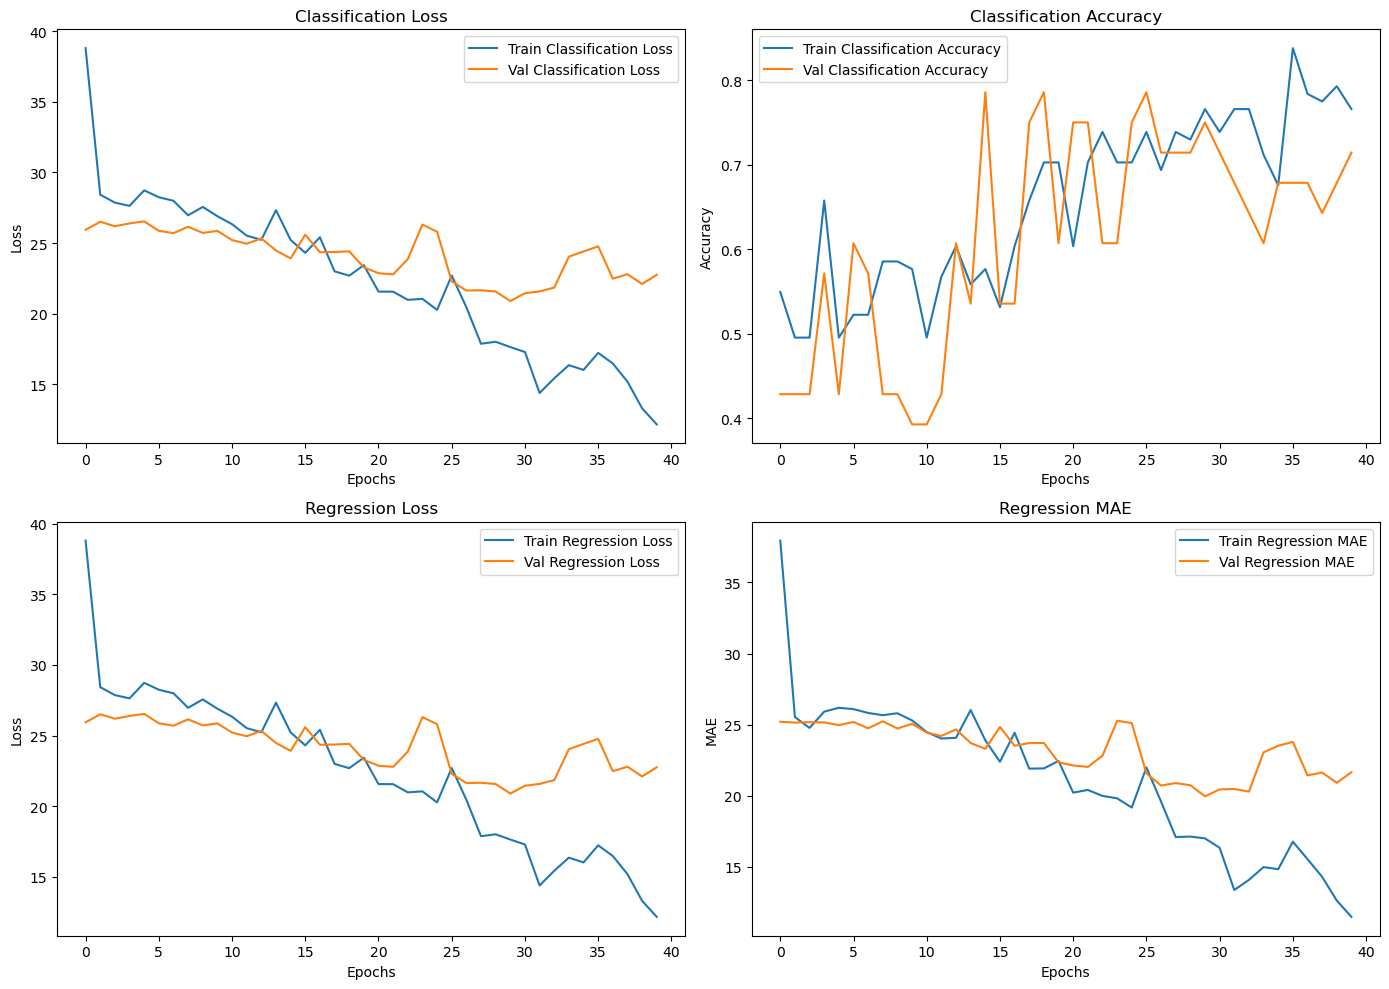

In [14]:


# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the loss of the gender classification over the training and validation set
axs[0, 0].plot(history.history['loss'], label='Train Classification Loss')
axs[0, 0].plot(history.history['val_loss'], label='Val Classification Loss')
axs[0, 0].set_title('Classification Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot the accuracy of the gender classification over the training and validation set
axs[0, 1].plot(history.history['classification_output_accuracy'], label='Train Classification Accuracy')
axs[0, 1].plot(history.history['val_classification_output_accuracy'], label='Val Classification Accuracy')
axs[0, 1].set_title('Classification Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot the loss of the age estimation over the training and validation set
axs[1, 0].plot(history.history['loss'], label='Train Regression Loss')
axs[1, 0].plot(history.history['val_loss'], label='Val Regression Loss')
axs[1, 0].set_title('Regression Loss')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Plot the MAE of the age estimation over the training and validation set
axs[1, 1].plot(history.history['regression_output_mae'], label='Train Regression MAE')
axs[1, 1].plot(history.history['val_regression_output_mae'], label='Val Regression MAE')
axs[1, 1].set_title('Regression MAE')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
print(history.history.keys())


dict_keys(['classification_output_accuracy', 'loss', 'regression_output_mae', 'val_classification_output_accuracy', 'val_loss', 'val_regression_output_mae'])
